# TCS_Stock_Analysis

!pip install nsepy

In [50]:
!pip install nsepy 
!pip install seaborn
!pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')
import nsepy as nse
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [51]:
from datetime import date
import datetime
current_time=datetime.datetime.now()


In [52]:
formatted_time = current_time.strftime("%d-%m-%Y")

In [53]:
formatted_time

'06-03-2024'

In [54]:
#bp=nse.get_history(symbol='BERGEPAINT',start=date(2010,1,1),end=date(current_time.year,current_time.month,current_time.day))

In [55]:
from nselib import capital_market
bp = capital_market.price_volume_and_deliverable_position_data(symbol='BERGEPAINT', from_date='01-01-2010', to_date=formatted_time)
from pprint import pprint
bp.head()

,Symbol,Series,Date,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,TurnoverInRs,No.ofTrades,DeliverableQty,%DlyQttoTradedQty
0,BERGEPAINT,EQ,04-Jan-2010,60.00,60.2,61.00,59.80,60.60,60.45,60.55,"1,15,840","70,13,584.75",-,"52,675",45.47
1,BERGEPAINT,EQ,05-Jan-2010,60.45,60.6,61.55,60.15,60.50,60.55,60.87,"1,83,787","1,11,86,249.80",-,"1,04,364",56.79
2,BERGEPAINT,EQ,06-Jan-2010,60.55,60.6,62.50,60.20,61.00,61.00,61.36,"1,62,261","99,55,817.20",-,"75,940",46.8
3,BERGEPAINT,EQ,07-Jan-2010,61.00,61.4,61.70,60.60,60.85,61.05,60.98,"68,512","41,77,680.85",-,"37,092",54.14
4,BERGEPAINT,EQ,08-Jan-2010,61.05,61.1,61.90,60.25,60.90,60.90,61.26,"1,08,841","66,67,969.25",-,"40,547",37.25


In [56]:
bp.head()

,Symbol,Series,Date,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,TurnoverInRs,No.ofTrades,DeliverableQty,%DlyQttoTradedQty
0,BERGEPAINT,EQ,04-Jan-2010,60.00,60.2,61.00,59.80,60.60,60.45,60.55,"1,15,840","70,13,584.75",-,"52,675",45.47
1,BERGEPAINT,EQ,05-Jan-2010,60.45,60.6,61.55,60.15,60.50,60.55,60.87,"1,83,787","1,11,86,249.80",-,"1,04,364",56.79
2,BERGEPAINT,EQ,06-Jan-2010,60.55,60.6,62.50,60.20,61.00,61.00,61.36,"1,62,261","99,55,817.20",-,"75,940",46.8
3,BERGEPAINT,EQ,07-Jan-2010,61.00,61.4,61.70,60.60,60.85,61.05,60.98,"68,512","41,77,680.85",-,"37,092",54.14
4,BERGEPAINT,EQ,08-Jan-2010,61.05,61.1,61.90,60.25,60.90,60.90,61.26,"1,08,841","66,67,969.25",-,"40,547",37.25


In [57]:
bp.shape

(3544, 15)

In [58]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Symbol               3544 non-null   object 
 1   Series               3544 non-null   object 
 2   Date                 3544 non-null   object 
 3   PrevClose            3544 non-null   float64
 4   OpenPrice            3544 non-null   float64
 5   HighPrice            3544 non-null   float64
 6   LowPrice             3544 non-null   float64
 7   LastPrice            3544 non-null   float64
 8   ClosePrice           3544 non-null   float64
 9   AveragePrice         3544 non-null   float64
 10  TotalTradedQuantity  3544 non-null   object 
 11  TurnoverInRs         3544 non-null   object 
 12  No.ofTrades          3544 non-null   object 
 13  DeliverableQty       3544 non-null   object 
 14  %DlyQttoTradedQty    3544 non-null   object 
dtypes: float64(7), object(8)
memory usage:

In [59]:
bp.describe()

,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice
count,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000
mean,345.474549,346.120358,350.951340,340.987204,345.828005,345.747757,346.043174
std,218.651412,218.914410,220.989374,216.244787,218.647879,218.601896,218.542062
min,54.450000,54.850000,55.000000,51.050000,54.400000,54.450000,54.310000
25%,203.112500,204.000000,207.887500,200.000000,203.937500,203.237500,203.555000
50%,260.950000,261.525000,265.400000,257.850000,261.100000,261.025000,261.930000
75%,558.612500,559.400000,565.000000,551.137500,558.662500,558.925000,558.935000
max,864.950000,872.950000,872.950000,851.550000,860.800000,864.950000,859.330000


In [60]:
bp.isnull().sum()

Symbol                 0
Series                 0
Date                   0
PrevClose              0
OpenPrice              0
HighPrice              0
LowPrice               0
LastPrice              0
ClosePrice             0
AveragePrice           0
TotalTradedQuantity    0
TurnoverInRs           0
No.ofTrades            0
DeliverableQty         0
%DlyQttoTradedQty      0
dtype: int64

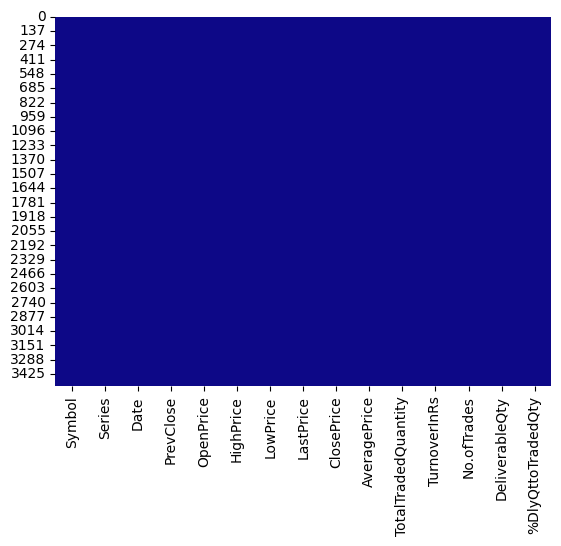

In [61]:
sns.heatmap(data=bp.isnull(), cmap='plasma', cbar=False);

In [62]:
#bp['Trades']=bp['Trades'].fillna(method='bfill')

In [63]:
bp.isnull().sum()

Symbol                 0
Series                 0
Date                   0
PrevClose              0
OpenPrice              0
HighPrice              0
LowPrice               0
LastPrice              0
ClosePrice             0
AveragePrice           0
TotalTradedQuantity    0
TurnoverInRs           0
No.ofTrades            0
DeliverableQty         0
%DlyQttoTradedQty      0
dtype: int64

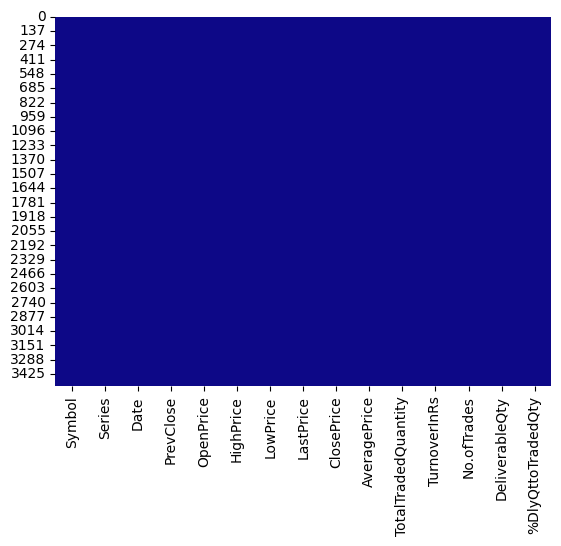

In [64]:
sns.heatmap(data=bp.isnull(), cmap='plasma', cbar=False);

In [65]:
bp.duplicated().sum()

15

In [66]:
bp.drop_duplicates(inplace=True)

In [67]:
bp.duplicated().sum()

0

In [68]:
#since 'Symbol' and 'Series' is constant value we can drop it
bp.drop(['Symbol','Series'],axis=1,inplace=True)

# EDA

<AxesSubplot: >

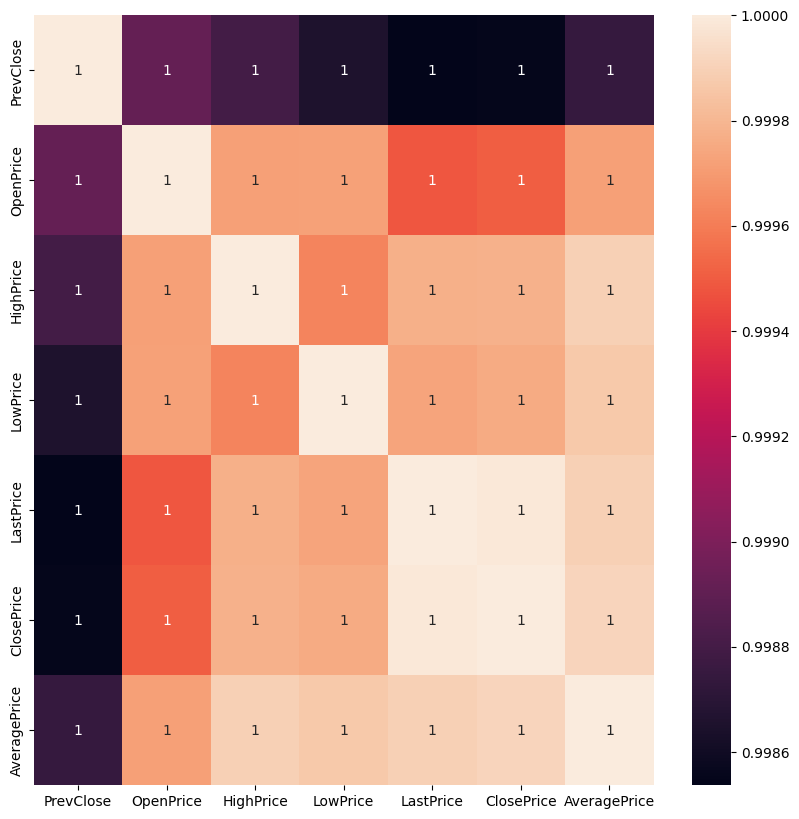

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(bp.corr(),annot=True)

we observe from scatter plot and heat map

1.Prev Close,open,High,Low,Last,Close,VWAP is higly co related with each other.

2.Volume is highly corelated with Turnover,Deliverable Volume.

3.Trades is moderatly co related with volume,Turnover,Deliverable volume.

4.Deliverable Volume is highly co related with Volume,Turnover and moderatly with Trades.

5.%Deliverable Volume is moderatly co related with Deliverable Volume

In [70]:
#we are considering columns 
bp=bp[['OpenPrice','HighPrice','LowPrice','ClosePrice']]

In [71]:
bp.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice
0,60.2,61.00,59.80,60.45
1,60.6,61.55,60.15,60.55
2,60.6,62.50,60.20,61.00
3,61.4,61.70,60.60,61.05
4,61.1,61.90,60.25,60.90


In [72]:
column_mapping = {'OpenPrice': 'Open', 'HighPrice': 'High','LowPrice':'Low','ClosePrice':'Close'}
# cahnge bp column name to Column mapping

bp.rename(columns=column_mapping,inplace=True)
bp.head()
bp.shape
bp.info()
bp.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3529 entries, 0 to 3543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3529 non-null   float64
 1   High    3529 non-null   float64
 2   Low     3529 non-null   float64
 3   Close   3529 non-null   float64
dtypes: float64(4)
memory usage: 137.9 KB


,Open,High,Low,Close
count,3529.000000,3529.000000,3529.000000,3529.000000
mean,345.193893,350.026736,340.098073,344.852281
std,218.913697,221.000347,216.269277,218.629799
min,54.850000,55.000000,51.050000,54.450000
25%,203.850000,207.000000,199.000000,202.900000
50%,260.900000,264.900000,257.050000,260.850000
75%,559.000000,565.000000,550.600000,558.600000
max,872.950000,872.950000,851.550000,864.950000


In [73]:
bp.head()

,Open,High,Low,Close
0,60.2,61.00,59.80,60.45
1,60.6,61.55,60.15,60.55
2,60.6,62.50,60.20,61.00
3,61.4,61.70,60.60,61.05
4,61.1,61.90,60.25,60.90


In [74]:
bp.head()

,Open,High,Low,Close
0,60.2,61.00,59.80,60.45
1,60.6,61.55,60.15,60.55
2,60.6,62.50,60.20,61.00
3,61.4,61.70,60.60,61.05
4,61.1,61.90,60.25,60.90


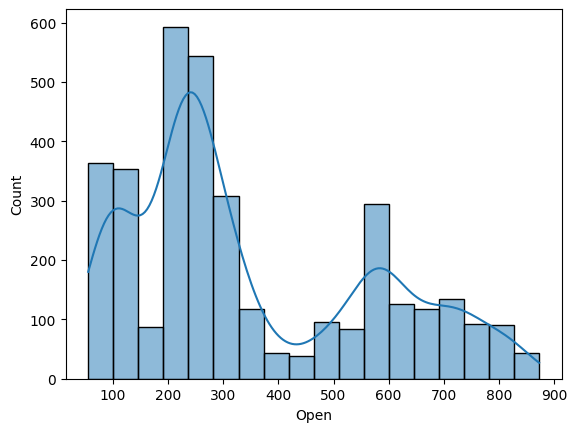

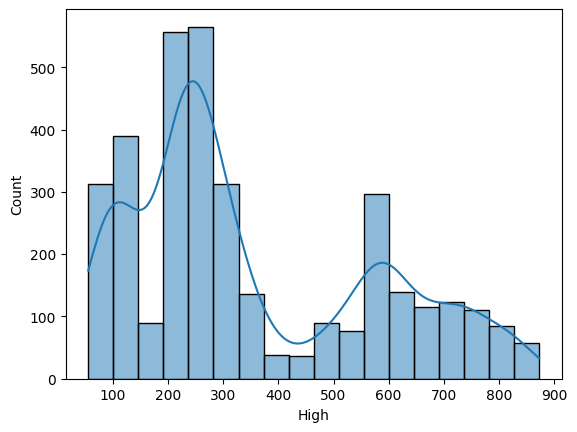

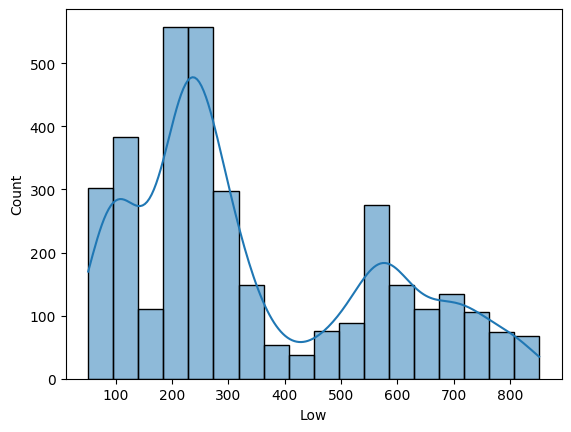

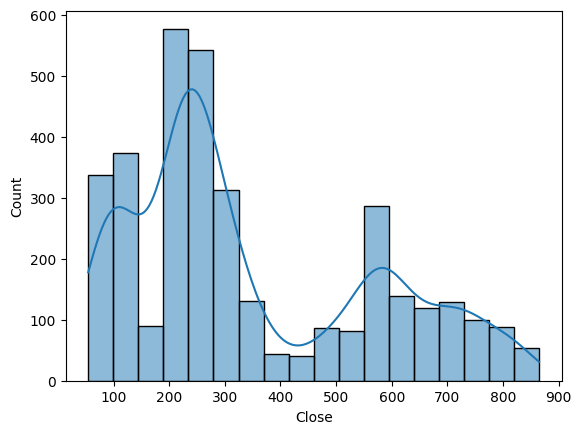

In [75]:
for i in bp.columns:
    sns.histplot(bp[i],kde=True)
    plt.show()

Open,High,Low,Close is not normally distributed.


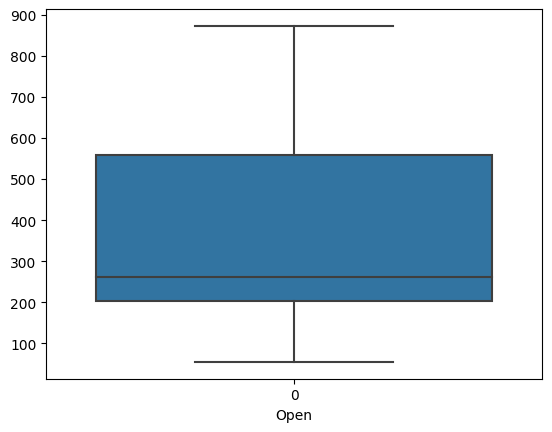

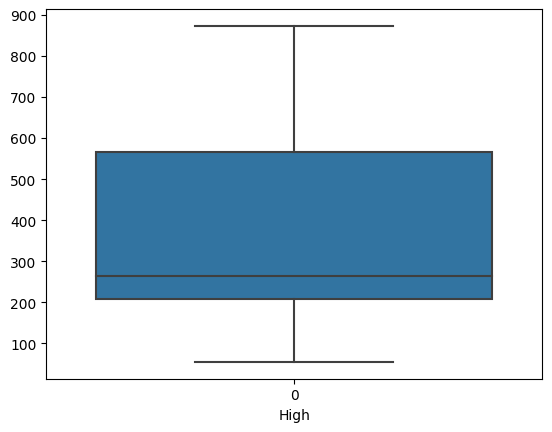

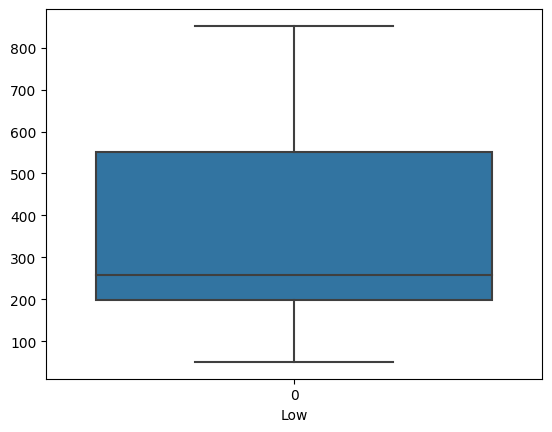

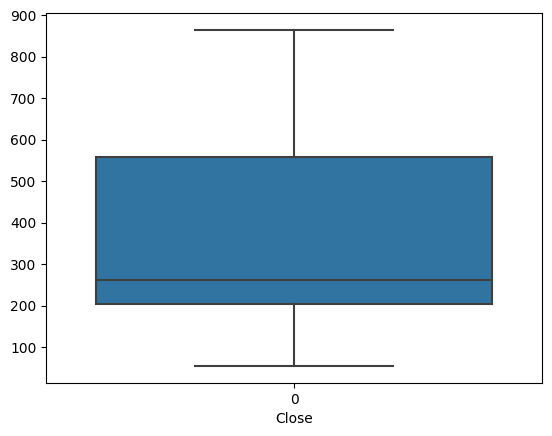

In [76]:
for i in bp.columns:
        sns.boxplot(bp[i])
        plt.xlabel(i)
        plt.show()

There are no outliers in Open,High,Low,Close.

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

<Figure size 1000x1000 with 0 Axes>

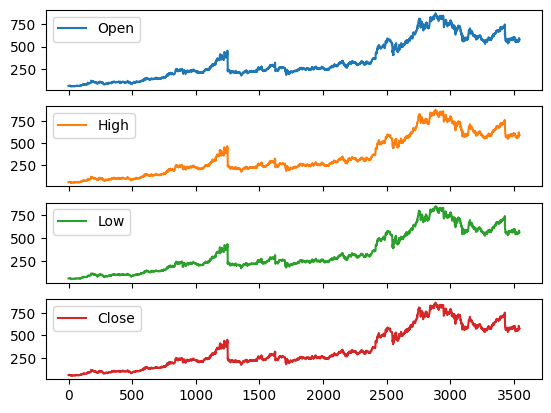

In [77]:
plt.figure(figsize=(10,10))
bp.plot(subplots=True)

In Open,High,Low,Close we can see trend is increasing over the time.

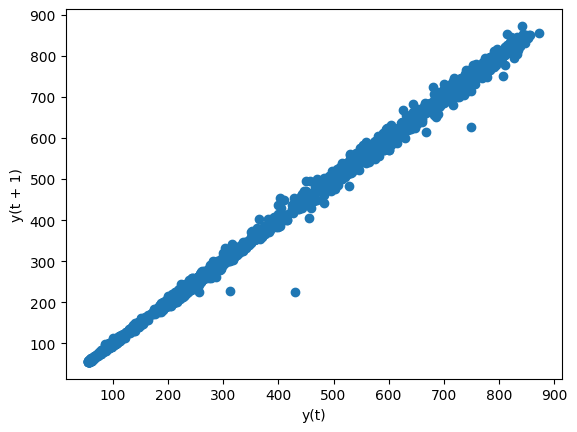

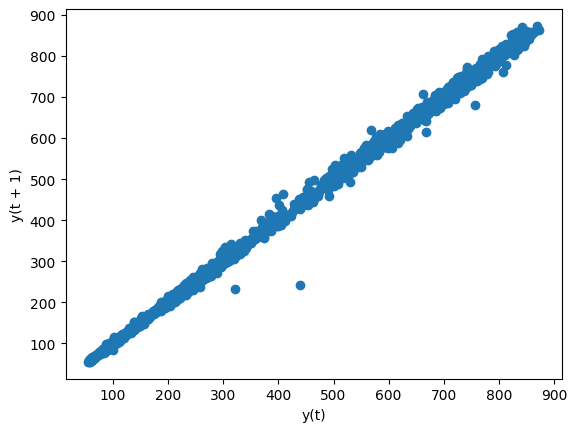

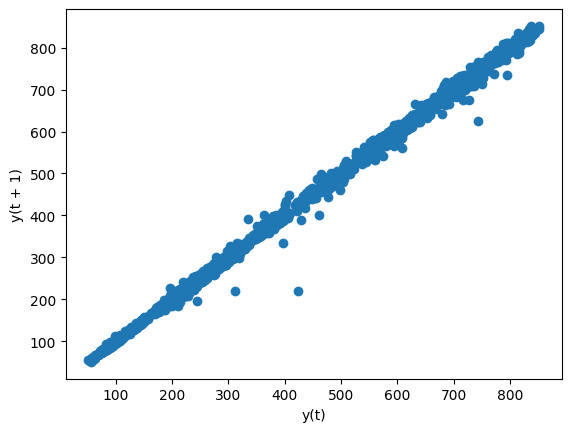

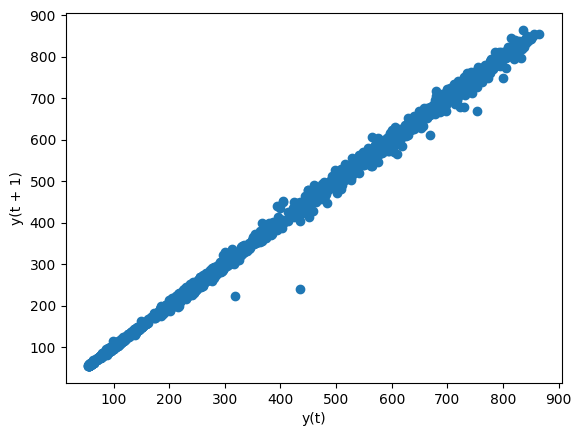

In [78]:
from pandas.plotting import lag_plot
for i in bp.columns:
    lag_plot(bp[i])
    plt.show()

From lag_plot,we can visualize the autocorrelation structure of the time series data.
1. In Open,High,Low,Close feature it suggests a strong positive autocorrelation.

### Time series decomposition plot

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


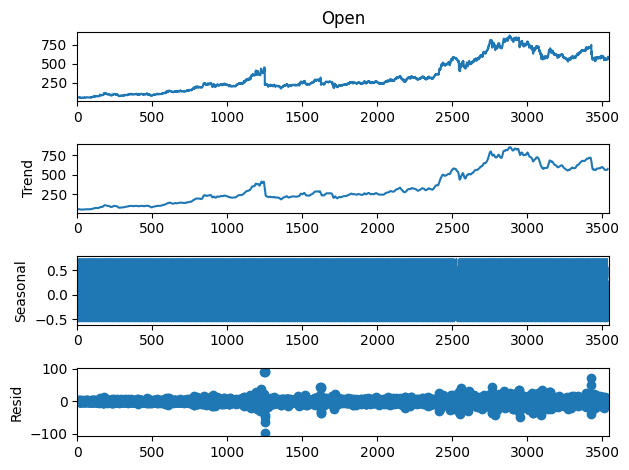

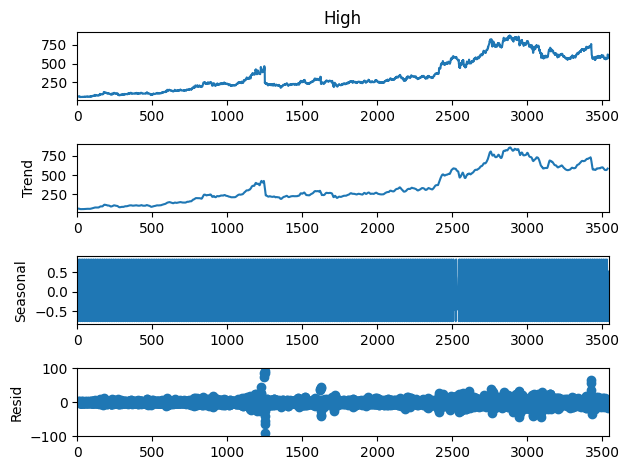

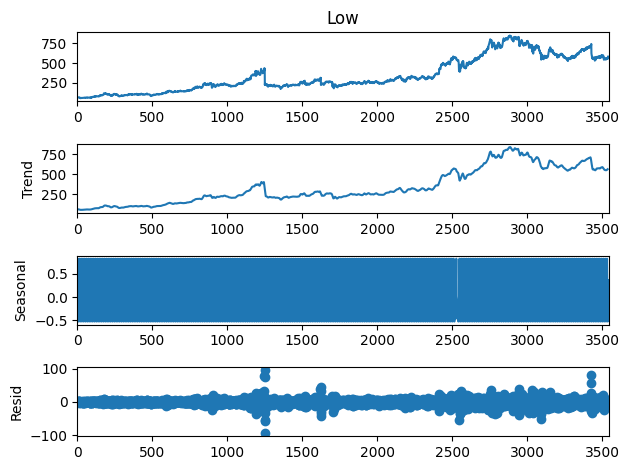

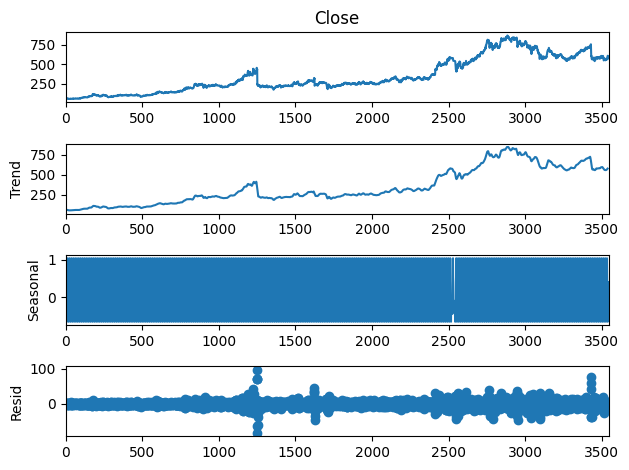

In [79]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
for i in bp.columns:
    decompose_ts_add = seasonal_decompose(bp[i],period=12)
    decompose_ts_add.plot()
    plt.show()

## Pre-Processing


In [80]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(bp)

## Train and Test data

In [81]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[0:train_size,:]
test_data = scaled_data[train_size:len(scaled_data),:]

In [82]:
test_data

array([[0.87660433, 0.89125252, 0.89269207, 0.89666872],
       [0.89249481, 0.90836848, 0.9131168 , 0.90789636],
       [0.89396162, 0.90610673, 0.91336665, 0.90536706],
       ...,
       [0.65982154, 0.65975915, 0.65371643, 0.64706971],
       [0.63641364, 0.64398802, 0.64828232, 0.64386181],
       [0.6359247 , 0.64796137, 0.64472205, 0.64571252]])

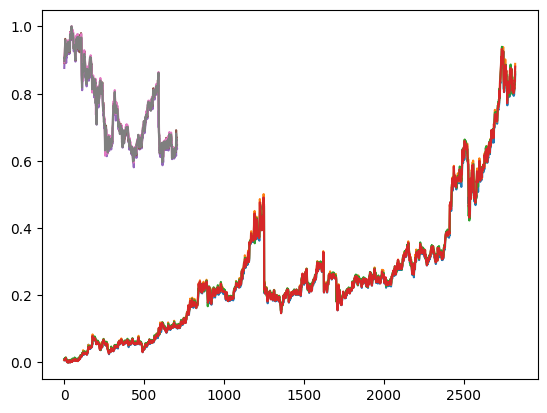

In [83]:
plt.plot(train_data)
plt.plot(test_data)

In [84]:
def create_dataset(data, time_step=1):
    X_data, y_data = [], []
    for i in range(len(data)-time_step):
        X_data.append(data[i:(i+time_step), :])
        y_data.append(data[i+time_step, :])
    return np.array(X_data), np.array(y_data)


In [85]:
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


## Model Building

In [86]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 4)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(4))


In [87]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
44/44 [==============================] - 7s 55ms/step - loss: 0.0132
Epoch 2/50
44/44 [==============================] - 2s 56ms/step - loss: 7.8671e-04
Epoch 3/50
44/44 [==============================] - 2s 54ms/step - loss: 6.6385e-04
Epoch 4/50
44/44 [==============================] - 2s 52ms/step - loss: 6.4865e-04
Epoch 5/50
44/44 [==============================] - 2s 52ms/step - loss: 6.2702e-04
Epoch 6/50
44/44 [==============================] - 2s 44ms/step - loss: 5.7262e-04
Epoch 7/50
44/44 [==============================] - 2s 48ms/step - loss: 5.7158e-04
Epoch 8/50
44/44 [==============================] - 2s 44ms/step - loss: 6.1169e-04
Epoch 9/50
44/44 [==============================] - 2s 44ms/step - loss: 4.8988e-04
Epoch 10/50
44/44 [==============================] - 2s 45ms/step - loss: 5.1630e-04
Epoch 11/50
44/44 [==============================] - 2s 43ms/step - loss: 5.2094e-04
Epoch 12/50
44/44 [==============================] - 2s 43ms/step - loss: 4.57

In [88]:
predictions = model.predict(X_test)


21/21 [==============================] - 1s 13ms/step


In [89]:
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)


In [90]:
predictions

array([[809.3303 , 811.5902 , 799.5626 , 799.11066],
       [807.549  , 809.79193, 797.4753 , 798.3437 ],
       [811.38873, 813.0522 , 800.7313 , 803.48016],
       ...,
       [598.35175, 600.1044 , 585.4977 , 597.3368 ],
       [594.6386 , 597.1099 , 582.4239 , 592.3451 ],
       [583.659  , 587.5022 , 572.5619 , 580.2392 ]], dtype=float32)

In [91]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print('RMSE:', rmse)


RMSE: 11.165401809146319


last_60_days = tcs[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_pred = []
X_pred.append(last_60_days_scaled)
X_pred = np.array(X_pred)
for i in range(30):
    pred = model.predict


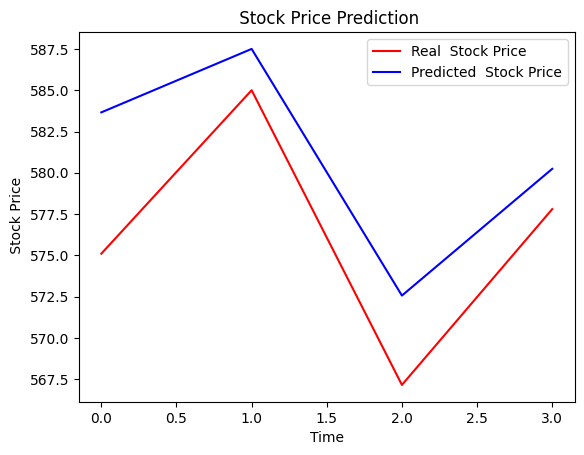

In [92]:
plt.plot(y_test[-1], color = 'red', label = 'Real  Stock Price')
plt.plot(predictions[-1], color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [93]:
n_future = 30  # Number of days to forecast
n_past = 60    #Past 60 days

In [94]:
last_60_days = scaled_data[-n_past:]
X_test = np.array([last_60_days])
for i in range(n_future):
    next_day_pred = model.predict(X_test)[0, 0]
    last_60_days = np.append(last_60_days[1:, :], [[next_day_pred, next_day_pred, next_day_pred, next_day_pred]], axis=0)
    X_test = np.array([last_60_days])
    print("Day {}: {}".format(i+1, scaler.inverse_transform([[0, 0, 0, next_day_pred]])[0, 3]))

1/1 [==============================] - 0s 25ms/step
Day 1: 571.312437337637
1/1 [==============================] - 0s 25ms/step
Day 2: 567.0735145926476
1/1 [==============================] - 0s 24ms/step
Day 3: 564.3694350242615
1/1 [==============================] - 0s 27ms/step
Day 4: 562.5425122201443
1/1 [==============================] - 0s 24ms/step
Day 5: 561.1398440122605
1/1 [==============================] - 0s 23ms/step
Day 6: 559.8350992918015
1/1 [==============================] - 0s 23ms/step
Day 7: 558.4134937345982
1/1 [==============================] - 0s 24ms/step
Day 8: 556.7610167682171
1/1 [==============================] - 0s 24ms/step
Day 9: 554.848441106081
1/1 [==============================] - 0s 23ms/step
Day 10: 552.7083757042885
1/1 [==============================] - 0s 24ms/step
Day 11: 550.4092752158642
1/1 [==============================] - 0s 25ms/step
Day 12: 548.0314301371575
1/1 [==============================] - 0s 24ms/step
Day 13: 545.64914057850

In [95]:
import pickle

filename='bp_trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [96]:
loaded_model=pickle.load(open('bp_trained_model.sav','rb'))

In [97]:
last_30_days = scaled_data[-n_past:]
X_test = np.array([last_30_days])
predictions = []

for i in range(n_future):
    next_day_pred = loaded_model.predict(X_test)[0, 0]
    last_30_days = np.append(last_30_days[1:, :], [[next_day_pred, next_day_pred, next_day_pred, next_day_pred]], axis=0)
    X_test = np.array([last_30_days])
    pred_value = scaler.inverse_transform([[0, 0, 0, next_day_pred]])[0, 3]
    predictions.append(pred_value)
    print("Day {}: {}".format(i+1, pred_value))


1/1 [==============================] - 1s 1s/step
Day 1: 571.312437337637
1/1 [==============================] - 0s 26ms/step
Day 2: 567.0735145926476
1/1 [==============================] - 0s 25ms/step
Day 3: 564.3694350242615
1/1 [==============================] - 0s 25ms/step
Day 4: 562.5425122201443
1/1 [==============================] - 0s 26ms/step
Day 5: 561.1398440122605
1/1 [==============================] - 0s 25ms/step
Day 6: 559.8350992918015
1/1 [==============================] - 0s 24ms/step
Day 7: 558.4134937345982
1/1 [==============================] - 0s 25ms/step
Day 8: 556.7610167682171
1/1 [==============================] - 0s 23ms/step
Day 9: 554.848441106081
1/1 [==============================] - 0s 24ms/step
Day 10: 552.7083757042885
1/1 [==============================] - 0s 25ms/step
Day 11: 550.4092752158642
1/1 [==============================] - 0s 25ms/step
Day 12: 548.0314301371575
1/1 [==============================] - 0s 24ms/step
Day 13: 545.6491405785084

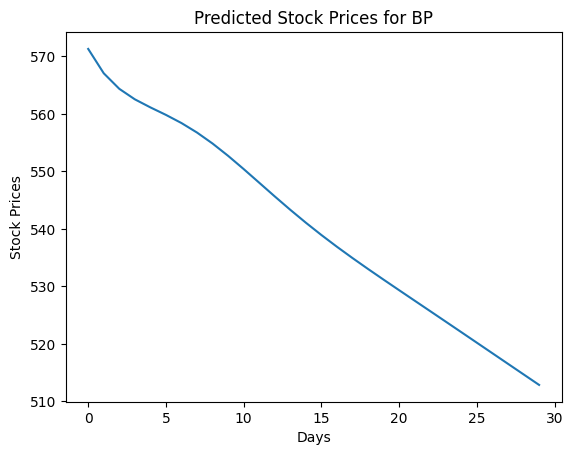

In [98]:
plt.plot(predictions,label='Close')
plt.title('Predicted Stock Prices for BP')
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.show()